--------------------------
#### Aim : to build simple demo code 
- to show how Adaboost works
---------------------------

In [1]:
import numpy  as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import tree

import graphviz 
from sklearn.tree import export_graphviz

In [2]:
location = r'U:\AI-DATASETS\01-MISC\adaboost-disease.csv'
df_disease = pd.read_csv(location)

In [3]:
df_disease

,Chest Pain,Blocked Arteries,Patient Weight,Heart Disease
0,Yes,Yes,205,YES
1,No,Yes,180,YES
2,Yes,No,210,YES
3,Yes,Yes,167,YES
4,No,Yes,156,NO
5,No,Yes,125,NO
6,Yes,No,168,NO
7,Yes,Yes,172,NO


In [4]:
# initialize default sample weight
df_disease['sample_weight'] = 1/len(df_disease)
df_disease

,Chest Pain,Blocked Arteries,Patient Weight,Heart Disease,sample_weight
0,Yes,Yes,205,YES,0.125
1,No,Yes,180,YES,0.125
2,Yes,No,210,YES,0.125
3,Yes,Yes,167,YES,0.125
4,No,Yes,156,NO,0.125
5,No,Yes,125,NO,0.125
6,Yes,No,168,NO,0.125
7,Yes,Yes,172,NO,0.125


In [5]:
# number of samples
n = df_disease.shape[0]

In [7]:
# convert to numeric
df_disease['Chest Pain'].replace({'Yes' : 1, 'No' : 0, }, inplace= True)
df_disease['Blocked Arteries'].replace({'Yes' : 1, 'No' : 0, }, inplace= True)

In [8]:
# copy the predictor variables into X and responses in y
X = df_disease.drop(['Heart Disease'], axis=1)
y = df_disease['Heart Disease']

In [9]:
y.unique()

array(['YES', 'NO'], dtype=object)

In [10]:
# decision tree model
clf = tree.DecisionTreeClassifier(max_depth=1, criterion='entropy')

In [11]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

C:\Users\V-BHSI~1\AppData\Local\Temp/ipykernel_3816/3274593486.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  feature_names=df_disease.drop('Heart Disease', 1).columns,


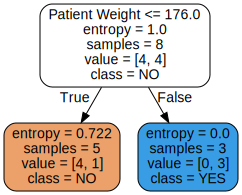

In [12]:
dot_data = export_graphviz( clf, 
                            feature_names=df_disease.drop('Heart Disease', 1).columns,  
                            class_names  =np.sort(y.unique() ) ,
                            filled       =True,
                            rounded      =True
                            )  

graph = graphviz.Source(dot_data)  

graph 

#### But first let us calculate the AMOUNT OF SAY for the current stump

Now calculate the "amount of say" for the current stump

We have 1 mis-classification in the stump. So the stump made one error in prediction. 

This error will be given higher sample weight in the next stump



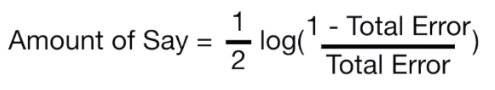

In [13]:
# number of misclassifications
total_error   = 1/n

In [14]:
# Calculate the amount of say of the decision stump
amount_of_say = 1/2 * np.log((1 - total_error)/total_error)
amount_of_say

0.9729550745276566

#### calculate the new sample weight for the mis-classified sample

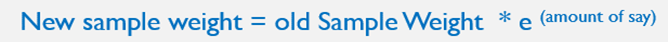

In [15]:
new_sample_weight_increase = np.around(0.125 * np.exp(amount_of_say), 4)

df_disease.loc[3, 'new_sample_weight'] = new_sample_weight_increase
df_disease

,Chest Pain,Blocked Arteries,Patient Weight,Heart Disease,sample_weight,new_sample_weight
0,1,1,205,YES,0.125,NaN
1,0,1,180,YES,0.125,NaN
2,1,0,210,YES,0.125,NaN
3,1,1,167,YES,0.125,0.3307
4,0,1,156,NO,0.125,NaN
5,0,1,125,NO,0.125,NaN
6,1,0,168,NO,0.125,NaN
7,1,1,172,NO,0.125,NaN


#### calculate the new sample weight for the correctly classified sample

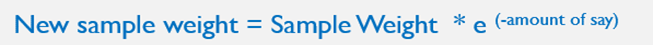

In [16]:
new_sample_weight_decrease = np.around(0.125 * np.exp(-amount_of_say), 2)

df_disease.loc[[0,1,2,4,5,6,7], 'new_sample_weight'] = new_sample_weight_decrease
df_disease

,Chest Pain,Blocked Arteries,Patient Weight,Heart Disease,sample_weight,new_sample_weight
0,1,1,205,YES,0.125,0.0500
1,0,1,180,YES,0.125,0.0500
2,1,0,210,YES,0.125,0.0500
3,1,1,167,YES,0.125,0.3307
4,0,1,156,NO,0.125,0.0500
5,0,1,125,NO,0.125,0.0500
6,1,0,168,NO,0.125,0.0500
7,1,1,172,NO,0.125,0.0500


In [17]:
df_disease['norm_weight'] = df_disease['new_sample_weight']/np.sum(df_disease.new_sample_weight)
df_disease

,Chest Pain,Blocked Arteries,Patient Weight,Heart Disease,sample_weight,new_sample_weight,norm_weight
0,1,1,205,YES,0.125,0.0500,0.073454
1,0,1,180,YES,0.125,0.0500,0.073454
2,1,0,210,YES,0.125,0.0500,0.073454
3,1,1,167,YES,0.125,0.3307,0.485823
4,0,1,156,NO,0.125,0.0500,0.073454
5,0,1,125,NO,0.125,0.0500,0.073454
6,1,0,168,NO,0.125,0.0500,0.073454
7,1,1,172,NO,0.125,0.0500,0.073454


In [18]:
df_disease['cum_weight'] = df_disease['norm_weight'].cumsum(axis=0) 
df_disease

,Chest Pain,Blocked Arteries,Patient Weight,Heart Disease,sample_weight,new_sample_weight,norm_weight,cum_weight
0,1,1,205,YES,0.125,0.0500,0.073454,0.073454
1,0,1,180,YES,0.125,0.0500,0.073454,0.146908
2,1,0,210,YES,0.125,0.0500,0.073454,0.220361
3,1,1,167,YES,0.125,0.3307,0.485823,0.706185
4,0,1,156,NO,0.125,0.0500,0.073454,0.779639
5,0,1,125,NO,0.125,0.0500,0.073454,0.853092
6,1,0,168,NO,0.125,0.0500,0.073454,0.926546
7,1,1,172,NO,0.125,0.0500,0.073454,1.000000


In [19]:
# create an empty data frame
df_resample = pd.DataFrame(columns= ['Chest Pain', 
                                     'Blocked Arteries', 
                                     'Patient Weight', 
                                     'Heart Disease',
                                     'sample_weight'])

df_resample.shape

(0, 5)

In [40]:
# Explanation

In [24]:
rand_pick = np.random.uniform(low=0.0, high=1.0)
rand_pick

0.39247598270310324

In [25]:
df_disease[df_disease.cum_weight >= rand_pick]

,Chest Pain,Blocked Arteries,Patient Weight,Heart Disease,sample_weight,new_sample_weight,norm_weight,cum_weight
3,1,1,167,YES,0.125,0.3307,0.485823,0.706185
4,0,1,156,NO,0.125,0.0500,0.073454,0.779639
5,0,1,125,NO,0.125,0.0500,0.073454,0.853092
6,1,0,168,NO,0.125,0.0500,0.073454,0.926546
7,1,1,172,NO,0.125,0.0500,0.073454,1.000000


In [26]:
# preprare the new resample dataset
samples_added =0

while samples_added < n:

    rand_pick = np.random.uniform(low=0.0, high=1.0)
    
    # get the sample from the original dataset
    sample_index = df_disease[df_disease.cum_weight >= rand_pick].index[0]
    
    # print(rand_pick, sample_index)
    resample_row = df_disease.loc[[sample_index], [ 'Chest Pain', 
                                                    'Blocked Arteries', 
                                                    'Patient Weight', 
                                                    'Heart Disease', 
                                                    'sample_weight']]
        
    df_resample = df_resample.append(resample_row, ignore_index = True)
    
    samples_added +=1

In [27]:
df_resample

,Chest Pain,Blocked Arteries,Patient Weight,Heart Disease,sample_weight
0,1,1,167,YES,0.125
1,1,1,167,YES,0.125
2,1,0,168,NO,0.125
3,1,0,168,NO,0.125
4,1,0,168,NO,0.125
5,1,1,167,YES,0.125
6,1,1,167,YES,0.125
7,1,1,167,YES,0.125
